In [240]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    if(orient == 'x'):
        sobel_out =  cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    else:
        sobel_out = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    abs_sobel_out = np.absolute(sobel_out)
    abs_sobel_out = np.uint8(255*(abs_sobel_out/np.max(abs_sobel_out)) )

    # Apply threshold
    binary_output = np.zeros_like(gray)
    binary_output[(abs_sobel_out>=thresh[0]) &(abs_sobel_out<=thresh[1])] = 1
    return binary_output

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    sobel_x =  cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    abs_sobel_xy = np.sqrt(sobel_x**2+sobel_y**2)
    abs_sobel_xy = np.uint8(255*(abs_sobel_xy/np.max(abs_sobel_xy)) )
    # Apply threshold
    mag_binary = np.zeros_like(gray)
    mag_binary[(abs_sobel_xy>=mag_thresh[0]) &(abs_sobel_xy<=mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    abs_sobel_x = np.abs(sobel_x)
    abs_sobel_y = np.abs(sobel_y)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    grad_dir = np.arctan2(abs_sobel_y, abs_sobel_x)
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(gray)
    binary_output[(grad_dir>=thresh[0]) &  (grad_dir<=thresh[1])]=1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_output

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements
image = plt.imread("./signs_vehicles_xygrad.png")

In [259]:
# Apply each of the thresholding functions
ksize = 3
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 255))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

In [260]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ( (mag_binary == 1) & (dir_binary == 1))] = 1

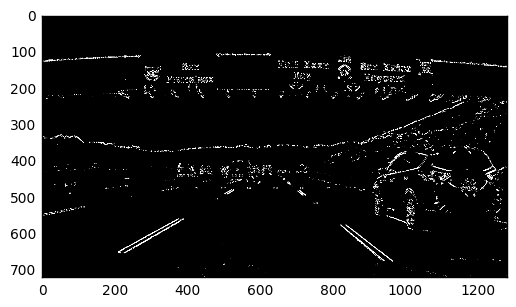

In [261]:
plt.imshow(combined,cmap="gray")